#### Common Code

In [134]:
### Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import os

warnings.filterwarnings('ignore')

In [135]:
from datetime import datetime, date, timedelta

In [136]:
pd.set_option('display.max_columns', None)
os.getcwd()

'c:\\Users\\laksh\\OneDrive\\Documents\\Summer 2023\\Practicum\\2023-06-20_HOM_AH_Data'

In [137]:
## Reading the dataset

admissions = pd.read_csv("2023-06-20_Admissions.csv")
clinical_measures = pd.read_csv("2023-06-20_Clincal_Measures.csv")
demographics = pd.read_csv("2023-06-20_Demographics.csv")
patient_basic = pd.read_csv("2023-06-20_Patient_Basic.csv")
pps = pd.read_csv("2023-06-20_PPS.csv")
statuses = pd.read_csv("2023-06-20_Statuses.csv")
visits = pd.read_csv("2023-06-20_Visits.csv")
hospice_item_set = pd.read_csv("2023-06-29_HIS_Form_Data.csv")


### Unique Patient IDs

In [156]:
# Extract unique patient IDs from each dataset
patient_basic_ids = set(patient_basic['PATIENT_ID'].unique())
pps_ids = set(pps['PatientId'].unique())
demographics_ids = set(demographics['PATIENT_ID'].unique())
admissions_ids = set(admissions['PATIENT_ID'].unique())
visits_ids = set(visits['PATIENT_ID'].unique())
clinical_measures_ids = set(clinical_measures['PatientId'].unique())
statuses_ids = set(statuses['PATIENT_ID'].unique())
hospice_item_set_ids = set(hospice_item_set['PATIENT_ID'].unique())

# Find the intersection of patient IDs from all datasets
shared_patient_ids = patient_basic_ids & pps_ids & demographics_ids & admissions_ids & visits_ids & clinical_measures_ids & statuses_ids & hospice_item_set_ids

# Print the number of shared patient IDs
num_shared_patient_ids = len(shared_patient_ids)
print("Number of Shared Patient IDs:", num_shared_patient_ids)

Number of Shared Patient IDs: 14582


In [157]:
shared_patient_ids_1 = clinical_measures_ids & visits_ids & hospice_item_set_ids & pps_ids & admissions_ids

# Print the number of shared patient IDs
num_shared_patient_ids_1 = len(shared_patient_ids_1)
print("Number of Shared Patient IDs:", num_shared_patient_ids_1)

Number of Shared Patient IDs: 24829


In [160]:
shared_patient_ids_1

{1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 30,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 43,
 44,
 45,
 47,
 48,
 49,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 129,
 130,
 131,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 143,
 144,
 145,
 147,
 149,
 150,
 151,
 152,
 154,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 203,
 205,
 206,
 207,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 218,
 219,
 220,
 221,
 222,
 223,
 

In [158]:
df = pd.DataFrame(shared_patient_ids_1)


In [159]:
#from sets import Sets
df.to_csv(r'C:\Users\laksh\OneDrive\Documents\Summer 2023\Practicum\2023-06-20_HOM_AH_Data\Shared_Patient_IDs.csv', index=True)


#### Functions

In [8]:
### Function for calculating missing data % in the dataframe
def missing_data(df):
  df_missing = df.isna().sum() / df.shape[0] * 100
  return df_missing

####  1. Admissions

In [12]:
admissions.head()

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_TRANSFER_IN_FACILITY,HOSPICE_START_CERT_PERIOD_NO,VERBAL_START_OF_CARE_DATE,FIRST_CERTIFICATION_DATE,ANTICIPATED_ADMISSION_DATE,INPATIENT_DISCHARGE_DATE,PHYSICIAN_ID1,PHYSICIAN1,PHYSICIAN_ID2,PHYSICIAN2,PHYSICIAN_ID3,PHYSICIAN3,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,ADMISSION_CODE,PHYSICIAN_ORDERED_SOC,PHYSICIAN_ORDERED_ROC,HOSPICE_TRANSFER_IN,VERBAL_START_OF_CARE_TIME,REFERRAL_SOURCE,REFERRAL_SOURCE_NAME,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION,REFERRAL_MD_ID,REFERRAL_MD,REFERRAL_FACILITY_ID,REFERRAL_FACILITY,ADMISSION_SOURCE
0,137093,13019,2021-05-07,2021-05-27,2021-05-05,2021-05-06,2021-05-07,2021-05-07,NaN,1.0,NaN,NaN,NaN,NaN,676631,"Musolf, Karen",NaN,NaN,786222.0,"Hanlon, Kaitlin",PN,Part Time Non-Live in,Arbor Hospice,1,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95784,28834,2016-09-16,2017-02-24,2016-09-14,2016-09-15,2016-09-16,2016-09-16,NaN,1.0,2016-09-14,NaN,NaN,NaN,98916,"Fonger, Evan",NaN,NaN,3659.0,"Winters, Frank",PE,Pending Evaluation,SE,1,NaN,NaN,NaN,Y,0.0,NaN,NaN,PH,Physician-Non HOM,NaN,NaN,NaN,NaN,NaN
2,95584,25277,2016-09-05,2016-11-01,2016-09-02,2016-09-04,2016-09-05,2016-09-05,NaN,1.0,2016-09-02,NaN,NaN,NaN,5907,"McAree, David",NaN,NaN,3833.0,"Bansal, Ashok",PE,Pending Evaluation,SE,1,NaN,NaN,NaN,Y,0.0,NaN,NaN,HC,"Hospital, Contracted",NaN,NaN,NaN,NaN,NaN
3,155456,2634,2023-01-18,2023-03-21,2022-12-15,2023-01-17,2023-01-18,2023-01-18,NaN,1.0,NaN,NaN,NaN,NaN,814998,"Judd, Carrie",NaN,NaN,NaN,NaN,PE,Pending Evaluation,SE,1,NaN,NaN,NaN,Y,NaN,NaN,NaN,HC,"Hospital, Contracted",NaN,NaN,NaN,NaN,NaN
4,106791,9777,2018-01-03,2018-01-07,2017-12-12,2018-01-02,2018-01-03,2018-01-03,NaN,1.0,2018-01-02,NaN,NaN,NaN,5907,"McAree, David",NaN,NaN,4488.0,"Mefta, Sheila",PE,Pending Evaluation,SE,1,NaN,NaN,NaN,Y,0.0,NaN,NaN,HC,"Hospital, Contracted",NaN,NaN,NaN,NaN,NaN


In [13]:
admissions.shape

(33750, 38)

In [14]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ADMISSION_ID                        33750 non-null  int64  
 1   PATIENT_ID                          33750 non-null  int64  
 2   ADMIT_DATE                          33750 non-null  object 
 3   TERMINATION_DATE                    33661 non-null  object 
 4   PROSPECT_ADMIT_DATE                 30569 non-null  object 
 5   PROSPECT_TERM_DATE                  30569 non-null  object 
 6   HOSPICE_FIRST_ELECTION_DATE         33431 non-null  object 
 7   HOSPICE_STARTING_CERT_DATE          33431 non-null  object 
 8   HOSPICE_TRANSFER_IN_FACILITY        5 non-null      float64
 9   HOSPICE_START_CERT_PERIOD_NO        33431 non-null  float64
 10  VERBAL_START_OF_CARE_DATE           13084 non-null  object 
 11  FIRST_CERTIFICATION_DATE            386 n

In [15]:
admissions.describe()

,ADMISSION_ID,PATIENT_ID,HOSPICE_TRANSFER_IN_FACILITY,HOSPICE_START_CERT_PERIOD_NO,ANTICIPATED_ADMISSION_DATE,PHYSICIAN_ID1,PHYSICIAN_ID2,PHYSICIAN_ID3,SEQUENCE,PHYSICIAN_ORDERED_SOC,PHYSICIAN_ORDERED_ROC,VERBAL_START_OF_CARE_TIME,REFERRAL_SOURCE,REFERRAL_SOURCE_NAME,REFERRAL_MD_ID,REFERRAL_FACILITY_ID
count,33750.000000,33750.000000,5.000000,33431.000000,0.0,33750.000000,5356.000000,18452.000000,33750.000000,0.0,0.0,11954.000000,0.0,0.0,135.000000,87.000000
mean,122505.884711,16035.529304,186814.200000,1.294427,NaN,334004.891556,364063.068335,410909.263657,1.170044,NaN,NaN,2054.083989,NaN,NaN,356999.066667,327888.183908
std,19802.677914,9252.181738,259956.087985,1.580817,NaN,323294.271437,326103.652130,322056.008278,0.522200,NaN,NaN,10425.384655,NaN,NaN,333772.451071,301136.939968
min,84091.000000,1.000000,3669.000000,1.000000,NaN,3654.000000,3659.000000,3654.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,4371.000000,3857.000000
25%,105534.250000,8014.250000,70454.000000,1.000000,NaN,6590.000000,30140.250000,58436.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,54376.500000,66767.500000
50%,122242.500000,16045.500000,72470.000000,1.000000,NaN,125114.000000,349895.000000,567400.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,141277.000000,143063.000000
75%,138301.750000,24056.750000,144223.000000,1.000000,NaN,676631.000000,714770.250000,722250.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,735609.500000,720917.500000
max,162272.000000,32052.000000,643255.000000,45.000000,NaN,819865.000000,821127.000000,811712.000000,12.000000,NaN,NaN,85500.000000,NaN,NaN,796310.000000,797476.000000


In [16]:
admissions.describe(include = 'object')

,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,VERBAL_START_OF_CARE_DATE,FIRST_CERTIFICATION_DATE,INPATIENT_DISCHARGE_DATE,PHYSICIAN1,PHYSICIAN2,PHYSICIAN3,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,ADMISSION_CODE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION,REFERRAL_MD,REFERRAL_FACILITY,ADMISSION_SOURCE
count,33750,33661,30569,30569,33431,33431,13084,386,82,33750,5356,18452,33750,33750,33750,16,33750,33749,33749,135,87,192
unique,2787,2784,2772,2786,3202,2794,1150,178,81,1848,2514,4691,13,13,12,10,2,76,78,103,47,7
top,2017-04-07,2022-01-26,2021-12-09,2017-04-06,1899-12-30,1899-12-30,2017-07-14,2016-06-13,2021-07-06,"O'Neil, Thomas","La Fave, Michelle","Hitzelberger, William",PE,Pending Evaluation,SE,H100,Y,HC,"Hospital, Contracted","Ruch, Joshua",Spectrum Health Ludington Hospital,G
freq,29,29,35,26,375,361,25,133,2,3578,103,309,14040,14040,9418,4,27721,8608,8608,5,9,85


In [17]:
### Converting columns to a datetime
admissions['ADMIT_DATE'] = pd.to_datetime(admissions['ADMIT_DATE'])

In [18]:
missing_data_admissions = missing_data(admissions)
missing_data_admissions

ADMISSION_ID                            0.000000
PATIENT_ID                              0.000000
ADMIT_DATE                              0.000000
TERMINATION_DATE                        0.263704
PROSPECT_ADMIT_DATE                     9.425185
PROSPECT_TERM_DATE                      9.425185
HOSPICE_FIRST_ELECTION_DATE             0.945185
HOSPICE_STARTING_CERT_DATE              0.945185
HOSPICE_TRANSFER_IN_FACILITY           99.985185
HOSPICE_START_CERT_PERIOD_NO            0.945185
VERBAL_START_OF_CARE_DATE              61.232593
FIRST_CERTIFICATION_DATE               98.856296
ANTICIPATED_ADMISSION_DATE            100.000000
INPATIENT_DISCHARGE_DATE               99.757037
PHYSICIAN_ID1                           0.000000
PHYSICIAN1                              0.000000
PHYSICIAN_ID2                          84.130370
PHYSICIAN2                             84.130370
PHYSICIAN_ID3                          45.327407
PHYSICIAN3                             45.327407
CAREGIVER_CODE      

In [19]:
### Missing data with more than 50% in their columns in admissions
missing_data_admissions[missing_data_admissions > 50]

HOSPICE_TRANSFER_IN_FACILITY     99.985185
VERBAL_START_OF_CARE_DATE        61.232593
FIRST_CERTIFICATION_DATE         98.856296
ANTICIPATED_ADMISSION_DATE      100.000000
INPATIENT_DISCHARGE_DATE         99.757037
PHYSICIAN_ID2                    84.130370
PHYSICIAN2                       84.130370
ADMISSION_CODE                   99.952593
PHYSICIAN_ORDERED_SOC           100.000000
PHYSICIAN_ORDERED_ROC           100.000000
VERBAL_START_OF_CARE_TIME        64.580741
REFERRAL_SOURCE                 100.000000
REFERRAL_SOURCE_NAME            100.000000
REFERRAL_MD_ID                   99.600000
REFERRAL_MD                      99.600000
REFERRAL_FACILITY_ID             99.742222
REFERRAL_FACILITY                99.742222
ADMISSION_SOURCE                 99.431111
dtype: float64

In [20]:
columns_to_remove = missing_data_admissions[missing_data_admissions > 50].index

In [21]:
columns_to_remove

Index(['HOSPICE_TRANSFER_IN_FACILITY', 'VERBAL_START_OF_CARE_DATE',
       'FIRST_CERTIFICATION_DATE', 'ANTICIPATED_ADMISSION_DATE',
       'INPATIENT_DISCHARGE_DATE', 'PHYSICIAN_ID2', 'PHYSICIAN2',
       'ADMISSION_CODE', 'PHYSICIAN_ORDERED_SOC', 'PHYSICIAN_ORDERED_ROC',
       'VERBAL_START_OF_CARE_TIME', 'REFERRAL_SOURCE', 'REFERRAL_SOURCE_NAME',
       'REFERRAL_MD_ID', 'REFERRAL_MD', 'REFERRAL_FACILITY_ID',
       'REFERRAL_FACILITY', 'ADMISSION_SOURCE'],
      dtype='object')

In [22]:
admissions_modified =  admissions.drop(columns_to_remove, axis=1)

In [23]:
admissions_modified.columns

Index(['ADMISSION_ID', 'PATIENT_ID', 'ADMIT_DATE', 'TERMINATION_DATE',
       'PROSPECT_ADMIT_DATE', 'PROSPECT_TERM_DATE',
       'HOSPICE_FIRST_ELECTION_DATE', 'HOSPICE_STARTING_CERT_DATE',
       'HOSPICE_START_CERT_PERIOD_NO', 'PHYSICIAN_ID1', 'PHYSICIAN1',
       'PHYSICIAN_ID3', 'PHYSICIAN3', 'CAREGIVER_CODE',
       'CAREGIVER_CODE_DESCRIPTION', 'TEAM', 'SEQUENCE', 'HOSPICE_TRANSFER_IN',
       'REFERRAL_SOURCE_RESOURCE_TYPE_CODE', 'REFERRAL_SOURCE_DESCRIPTION'],
      dtype='object')

In [24]:
admissions_modified.head(2)

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_START_CERT_PERIOD_NO,PHYSICIAN_ID1,PHYSICIAN1,PHYSICIAN_ID3,PHYSICIAN3,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION
0,137093,13019,2021-05-07,2021-05-27,2021-05-05,2021-05-06,2021-05-07,2021-05-07,1.0,676631,"Musolf, Karen",786222.0,"Hanlon, Kaitlin",PN,Part Time Non-Live in,Arbor Hospice,1,Y,NaN,NaN
1,95784,28834,2016-09-16,2017-02-24,2016-09-14,2016-09-15,2016-09-16,2016-09-16,1.0,98916,"Fonger, Evan",3659.0,"Winters, Frank",PE,Pending Evaluation,SE,1,Y,PH,Physician-Non HOM


In [25]:
admissions_modified =  admissions_modified.drop(['PHYSICIAN_ID1', 'PHYSICIAN1',
       'PHYSICIAN_ID3', 'PHYSICIAN3'], axis=1)

In [26]:
admissions_modified.head(2)

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_START_CERT_PERIOD_NO,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION
0,137093,13019,2021-05-07,2021-05-27,2021-05-05,2021-05-06,2021-05-07,2021-05-07,1.0,PN,Part Time Non-Live in,Arbor Hospice,1,Y,NaN,NaN
1,95784,28834,2016-09-16,2017-02-24,2016-09-14,2016-09-15,2016-09-16,2016-09-16,1.0,PE,Pending Evaluation,SE,1,Y,PH,Physician-Non HOM


In [27]:
admissions_modified = admissions_modified.sort_values(by = 'ADMIT_DATE', axis = 0)

In [28]:
admissions_modified.reset_index(drop=True)

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_START_CERT_PERIOD_NO,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION
0,89167,14930,2015-11-01,2015-11-27,2015-10-28,2015-10-31,2015-07-27,2015-10-25,2.0,FL,Full Time Live in,SE,1,Y,HP,"Hospice, Other"
1,89225,23315,2015-11-01,2015-11-05,2015-10-31,2015-10-31,2015-11-01,2015-11-01,1.0,FL,Full Time Live in,SE,1,Y,HC,"Hospital, Contracted"
2,88765,14716,2015-11-01,2015-12-01,2015-10-07,2015-10-31,2015-11-01,2015-11-01,1.0,ST,Facility/AFC Staff,SE,1,Y,FM,Family Member/Friend
3,89234,15982,2015-11-02,2015-11-05,NaN,NaN,2015-11-02,2015-11-02,1.0,ST,Facility/AFC Staff,SW,1,Y,HC,"Hospital, Contracted"
4,93527,30206,2015-11-02,2017-04-26,NaN,NaN,2015-11-02,2015-11-02,1.0,PE,Pending Evaluation,Arbor Hospice,1,Y,HC,"Hospital, Contracted"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,162176,32025,2023-06-16,2023-06-19,2023-06-15,2023-06-15,2023-06-16,2023-06-16,1.0,PE,Pending Evaluation,SE,1,N,HC,"Hospital, Contracted"
33746,162215,32013,2023-06-16,2023-06-17,2023-06-16,2023-06-16,2023-06-16,2023-06-16,1.0,PE,Pending Evaluation,SE,1,N,HC,"Hospital, Contracted"
33747,161765,32009,2023-06-17,2023-06-20,2023-06-02,2023-06-16,2023-06-17,2023-06-17,1.0,FL,Full Time Live in,NW,1,Y,PT,Patient Task Category
33748,161926,6767,2023-06-18,NaN,2023-06-07,2023-06-17,2022-06-07,2023-06-18,7.0,PE,Pending Evaluation,SE,2,Y,HP,"Hospice, Other"


#### 2. Demographics

In [29]:
demographics.head()

,PATIENT_ID,EFFECTIVE_DATE,TITLE,DESCRIPTION
0,27649,2021-11-23,Is patient a veteran?,Yes
1,28220,2019-02-04,How did you hear of AH?,Hospital
2,8901,2019-02-14,Living Status,Lives with Spouse
3,22641,2019-07-30,How did you hear of AH?,Other
4,9363,2020-11-20,County,Manistee


In [30]:
demographics.shape

(218548, 4)

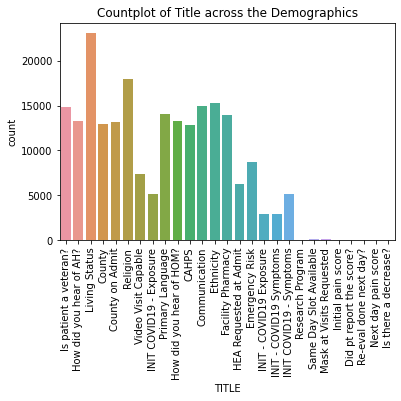

In [31]:
sns.countplot(data = demographics,x = 'TITLE')
plt.xticks(rotation= 90)
plt.title("Countplot of Title across the Demographics")
plt.show()

In [32]:
print('The % of missing data in the demographics table is as follows: ')
missing_data_demographics =  missing_data(demographics)
missing_data_demographics


The % of missing data in the demographics table is as follows: 


PATIENT_ID        0.0
EFFECTIVE_DATE    0.0
TITLE             0.0
DESCRIPTION       0.0
dtype: float64

In [33]:
options = ['Emergency Risk'] 
scales = ['High', 'Low', 'Moderate']   
demographics = demographics.loc[(demographics['TITLE'].isin(options)) & (demographics['DESCRIPTION'].isin(scales))]
# selecting rows based on condition 

In [34]:
demographics.head()

,PATIENT_ID,EFFECTIVE_DATE,TITLE,DESCRIPTION
40,289,2021-02-04,Emergency Risk,Moderate
42,4103,2022-10-20,Emergency Risk,Low
54,13735,2022-07-14,Emergency Risk,Low
70,24591,2022-11-09,Emergency Risk,High
106,9948,2020-04-02,Emergency Risk,Low


In [35]:
demographics.rename(columns={'DESCRIPTION': 'EMERGENCY_RISK'}, inplace=True)

In [36]:
demographics.drop(['TITLE'], axis=1)

,PATIENT_ID,EFFECTIVE_DATE,EMERGENCY_RISK
40,289,2021-02-04,Moderate
42,4103,2022-10-20,Low
54,13735,2022-07-14,Low
70,24591,2022-11-09,High
106,9948,2020-04-02,Low
...,...,...,...
218468,27477,2023-03-25,Moderate
218506,17467,2023-04-21,Low
218522,20456,2021-02-16,High
218541,9760,2022-06-19,Low


#### 3. visits

In [37]:
visits.head()

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,INDIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULE_DATE_TIME,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,CONFLICT,UNMADE_REASON,NO_VISITS,ACCOUNTING_DATE,END_DATE,EQUIPMENT_NAME,CPT_CODE,CPT_MODIFIER,HCPCS_CODE,NDC_CODE,PAID_INDICATOR,SUPPLEMENTAL_REVENUE_CODE,NOTES,VARIANCES_RECORDED,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,INVOICE_ID,SCHEDULE_DATE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,CONTRACT_ESTIMATED_COST,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,SKIP_UPDATE_SCQ,PLACE_OF_SERVICE,TYPE_OF_SERVICE,NON_COVERED,BASIS,SEQUENCE,DATE_PROVIDED_MONTH,ARC,HIPAA_REVENUE_CODE,FLAGS,PPS_CHARGE,SHIFT_MODIFIER,OVERRIDE_COST_ID,OVERRIDE_COST_DATE,SCHEDULE_MASTER_ID,PAY_COST_CRYPTED,OVERTIME_DURATION,BILLING_DURATION
0,6203159,15556,S,V,Verified,H150,Comprehensive Assessment,2015-11-04 10:00:00,"Szymanski, Ann",SO,"Social Worker, MSW",MSS,Medical Social Worker,120.0,NaN,20.0,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,100.0,N,126454.0,N,N,N,N,N,NaN,NaN,2015-11-04 00:00:00,2015-10-02 00:00:00,0.0,0.0,52.34,0.0,0.0,52.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6,A,V003,NaN,1.0,N,Y,NaN,NaN,NaN,N,V,6.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,120.0
1,6207243,6666,S,V,Verified,I100,Enrollment Visit,2015-11-02 10:00:00,"Doherty, Kathryn",R1,RN Southeast,SN,Skilled Nursing,60.0,NaN,30.0,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G0154,NaN,NaN,NaN,Walton Woods at University\r\nAssisted Living ...,NaN,N,N,NaN,N,132397.0,N,N,N,N,N,NaN,NaN,2015-11-02 00:00:00,2015-10-26 00:00:00,0.0,0.0,38.82,0.0,0.0,38.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6,A,V001,551.0,1.0,N,Y,N,NaN,NaN,N,V,1.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,60.0
2,6207245,6666,S,V,Verified,H100,Initial Assessment,2015-11-02 11:00:00,"Doherty, Kathryn",R1,RN Southeast,SN,Skilled Nursing,180.0,NaN,30.0,0.0,NaN,180.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G0154,NaN,NaN,NaN,NaN,NaN,N,N,100.0,N,132397.0,N,N,N,N,N,NaN,NaN,2015-11-02 00:00:00,2015-10-26 00:00:00,0.0,0.0,90.58,0.0,0.0,90.58,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,NaN,6,A,V001,551.0,1.0,N,Y,N,NaN,NaN,N,V,2.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,180.0
3,6208128,23315,S,V,Verified,A205,Non Visit Patient Care,2015-11-03 00:00:00,"Squire, Marnie",SO,"Social Worker, MSW",MSS,Medical Social Worker,10.0,NaN,NaN,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN,N,93955.0,N,N,N,N,N,NaN,NaN,2015-11-03 00:00:00,2015-10-27 00:00:00,0.0,0.0,3.74,0.0,0.0,3.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6,A,NaN,NaN,0.0,N,NaN,N,NaN,NaN,N,NaN,1.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,10.0
4,6208131,23315,S,V,Verified,H150,Comprehensive Assessment,2015-11-04 12:45:00,"Squire, Marnie",SO,"Social Worker, MSW",MSS,Medical Social Worker,105.0,NaN,25.0,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G0155,NaN,NaN,NaN,NaN,NaN,N,N,100.0,N,93955.0,N,N,N,N,N,NaN,NaN,2015-11-04 00:00:00,2015-10-27 00:00:00,0.0,0.0,48.60,0.0,0.0,48.60,128.0,0.0,0.0,128.0,128.0,0.0,0.0,128.0,128.0,0.0,0.0,128.0,NaN,6,A,V003,561.0,1.0,N,Y,NaN,NaN,NaN,N,V,1.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,105.0


In [38]:
visits.shape

(2373526, 94)

In [39]:
visits.columns

Index(['SERVICE_ID', 'PATIENT_ID', 'CATEGORY', 'STATUS', 'STATUS_DESCRIPTION',
       'SERVICE_CODE', 'SERVICE_CODE_DESCRIPTION', 'DATE_TIME_PROVIDED',
       'PROVIDING_RESOURCE', 'PROVIDING_RESOURCE_TYPE_CODE',
       'PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION', 'PROVIDING_DISCIPLINE_CODE',
       'PROVIDING_DISCIPLINE_CODE_DESCRIPTION', 'DIRECT_DURATION_MINUTES',
       'INDIRECT_DURATION_MINUTES', 'TRAVEL_DURATION_MINUTES', 'MILEAGE',
       'SCHEDULE_DATE_TIME', 'SCHEDULED_DIRECT_DURATION_MINUTES',
       'SCHEDULED_INDIRECT_DURATION_MINUTES',
       'SCHEDULED_TRAVEL_DURATION_MINUTES', 'SCHEDULED_MILEAGE', 'CONFLICT',
       'UNMADE_REASON', 'NO_VISITS', 'ACCOUNTING_DATE', 'END_DATE',
       'EQUIPMENT_NAME', 'CPT_CODE', 'CPT_MODIFIER', 'HCPCS_CODE', 'NDC_CODE',
       'PAID_INDICATOR', 'SUPPLEMENTAL_REVENUE_CODE', 'NOTES',
       'VARIANCES_RECORDED', 'PATIENT_CONFIRMED', 'RESOURCE_CONFIRMED',
       'VARIANCES_PERCENTAGE', 'HAS_SUPPLIES', 'RESOURCE_ID',
       'TIME_PROVISIONAL'

In [40]:
visits.isna().sum()

SERVICE_ID                  0
PATIENT_ID                  0
CATEGORY                    0
STATUS                      0
STATUS_DESCRIPTION          0
                       ...   
OVERRIDE_COST_DATE    2373526
SCHEDULE_MASTER_ID    2373526
PAY_COST_CRYPTED      2373526
OVERTIME_DURATION     2373526
BILLING_DURATION          218
Length: 94, dtype: int64

In [41]:
visits.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373526 entries, 0 to 2373525
Data columns (total 94 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   SERVICE_ID                                2373526 non-null  int64  
 1   PATIENT_ID                                2373526 non-null  int64  
 2   CATEGORY                                  2373526 non-null  object 
 3   STATUS                                    2373526 non-null  object 
 4   STATUS_DESCRIPTION                        2373526 non-null  object 
 5   SERVICE_CODE                              2373517 non-null  object 
 6   SERVICE_CODE_DESCRIPTION                  2373506 non-null  object 
 7   DATE_TIME_PROVIDED                        2373526 non-null  object 
 8   PROVIDING_RESOURCE                        2373212 non-null  object 
 9   PROVIDING_RESOURCE_TYPE_CODE              2373250 non-null  object 
 10  PROVID

In [42]:
visits.describe()

,SERVICE_ID,PATIENT_ID,DIRECT_DURATION_MINUTES,INDIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULE_DATE_TIME,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,CONFLICT,UNMADE_REASON,NO_VISITS,ACCOUNTING_DATE,END_DATE,EQUIPMENT_NAME,NDC_CODE,PAID_INDICATOR,SUPPLEMENTAL_REVENUE_CODE,VARIANCES_RECORDED,VARIANCES_PERCENTAGE,RESOURCE_ID,INVOICE_ID,SCHEDULE_DATE,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,CONTRACT_ESTIMATED_COST,DATASET_ID,REVENUE_CODE,UNITS,PLACE_OF_SERVICE,TYPE_OF_SERVICE,SEQUENCE,DATE_PROVIDED_MONTH,ARC,HIPAA_REVENUE_CODE,SHIFT_MODIFIER,OVERRIDE_COST_ID,OVERRIDE_COST_DATE,SCHEDULE_MASTER_ID,PAY_COST_CRYPTED,OVERTIME_DURATION,BILLING_DURATION
count,2.373526e+06,2.373526e+06,2.363852e+06,363418.000000,1.265041e+06,1.603306e+06,0.0,1.872083e+06,2.372664e+06,2.365846e+06,2.373335e+06,0.0,85510.000000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.942579e+06,2.373250e+06,0.0,0.0,2373050.0,2373050.0,2.373475e+06,2.373474e+06,2.373422e+06,2.373475e+06,2.373475e+06,2373474.0,2.373422e+06,2.373475e+06,2.373475e+06,2373474.0,2.373422e+06,2.373475e+06,2.373475e+06,2373474.0,2.373422e+06,2.373475e+06,0.0,2.373526e+06,1.451153e+06,2.373475e+06,0.0,0.0,989369.000000,2.373526e+06,0.0,0.0,0.0,2373050.0,0.0,0.0,0.0,0.0,2.373308e+06
mean,8.612325e+06,1.590468e+04,5.477003e+01,30.017426,2.424791e+01,1.586212e+00,NaN,4.050940e+01,6.707566e-02,2.093644e-01,2.791852e-02,NaN,4.823506,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.220248e+01,5.104673e+05,NaN,NaN,0.0,0.0,2.313021e+01,6.221605e-01,3.858859e-04,2.375275e+01,7.040525e+01,0.0,4.721369e-04,7.040572e+01,7.018265e+01,0.0,4.721369e-04,7.018312e+01,7.018251e+01,0.0,2.784924e-04,7.018279e+01,NaN,9.532143e+00,5.617683e+02,1.496522e+00,NaN,NaN,4.176754,1.436176e+03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.455451e+01
std,1.266832e+06,9.226075e+03,3.727671e+01,32.626095,2.594066e+01,7.402440e+00,NaN,3.561900e+01,2.029830e+00,3.811361e+00,8.695004e-01,NaN,1.707528,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.818821e+01,2.980066e+05,NaN,NaN,0.0,0.0,2.186846e+01,4.429791e+00,2.514453e-01,2.252435e+01,7.844829e+01,0.0,3.205009e-01,7.844852e+01,7.811699e+01,0.0,3.205009e-01,7.811722e+01,7.811697e+01,0.0,2.102302e-01,7.811700e+01,NaN,6.080624e+00,1.351208e+01,1.966611e+00,NaN,NaN,3.356652,2.378167e+01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.733614e+01
min,6.203159e+06,1.000000e+00,-1.395000e+03,0.000000,-3.800000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.733000e+03,NaN,NaN,0.0,0.0,-2.810300e+02,0.000000e+00,0.000000e+00,-2.810300e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NaN,6.000000e+00,4.210000e+02,0.000000e+00,NaN,NaN,0.000488,1.390000e+03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-7.160000e+02
25%,7.564888e+06,7.790000e+03,3.000000e+01,15.000000,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,4.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.284330e+05,NaN,NaN,0.0,0.0,9.350000e+00,0.000000e+00,0.000000e+00,1.002000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NaN,6.000000e+00,5.510000e+02,0.000000e+00,NaN,NaN,2.000000,1.417000e+03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.000000e+01
50%,8.571962e+06,1.589800e+04,6.000000e+01,20.000000,2.000000e+01,0.000000e+00,NaN,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,4.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,7.142000e+05,NaN,NaN,0.0,0.0,1.725000e+01,0.000000e+00,0.000000e+00,1.766000e+01,8.000000e+01,0.0,0.000000e+00,8.000000e+01,8.000000e+01,0.0,0.000000e+00,8.000000e+01,8.000000e

In [43]:
visits.describe(include = 'object')

,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,CPT_CODE,CPT_MODIFIER,HCPCS_CODE,NOTES,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,HAS_SUPPLIES,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,VERIFY_DATE,DATE_ENTERED,PATIENT_STATUS,BILL_RATE_CODE,PRN,PRINT_ACCUMULATED_VISIT_RECORD,SKIP_UPDATE_SCQ,NON_COVERED,BASIS,FLAGS,PPS_CHARGE
count,2373526,2373526,2373526,2373517,2373506,2373526,2373212,2373250,2373250,2373507,2347518,14483.0,385.0,1399137,552575,2373154,2373154,2372723,2373526,2370988,2373526,2373466,2373466,2286276,2136603,2372841,1683086,2373020,1697131,1179539,2373469,1618887,211236,2373469
unique,2,4,4,94,96,676749,2333,44,46,13,13,64.0,7.0,6,106061,2,2,2,2,1,1,1,1,2789,3422,4,62,2,1,1,1,4,4,1
top,S,V,Verified,H200,Routine Visit,2021-04-30 00:00:00,"Hancock, Ramona",R1,RN Southeast,SN,Skilled Nursing,99344.0,95.0,G0299,med eval,N,N,N,N,N,N,N,N,2019-01-04 00:00:00,2018-09-07 00:00:00,A,V001,N,Y,N,N,V,WM,N
freq,2373515,2286085,2286085,1242037,1242037,208,14135,425327,425327,989171,989171,2000.0,366.0,642775,3433,2372708,2275458,2372701,2372541,2370988,2373526,2373466,2373466,2191,5264,2254200,729532,2267397,1697131,1179539,2373469,1003988,206108,2373469


In [44]:
# sns.countplot(data = visits, x = 'STATUS_DESCRIPTION')
# plt.title("Status Description of the patient")
# plt.show()

In [45]:
# sns.countplot(data = visits, x = 'PATIENT_STATUS')
# plt.title("Status of the patients")
# plt.show()

In [46]:
# sns.countplot(data = visits, x = 'PATIENT_CONFIRMED')

In [47]:
# sns.countplot(data = visits, x = 'RESOURCE_CONFIRMED')

In [48]:
# Convert the 'Date' column to datetime
visits['DATE_TIME_PROVIDED'] = pd.to_datetime(visits['DATE_TIME_PROVIDED'])

In [49]:
print('The % of missing data in the visits table is as follows: ')
missing_data_visits = visits.isna().sum() / visits.shape[0] * 100
missing_data_visits


The % of missing data in the visits table is as follows: 


SERVICE_ID              0.000000
PATIENT_ID              0.000000
CATEGORY                0.000000
STATUS                  0.000000
STATUS_DESCRIPTION      0.000000
                         ...    
OVERRIDE_COST_DATE    100.000000
SCHEDULE_MASTER_ID    100.000000
PAY_COST_CRYPTED      100.000000
OVERTIME_DURATION     100.000000
BILLING_DURATION        0.009185
Length: 94, dtype: float64

In [50]:
visits.head(2)

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,INDIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULE_DATE_TIME,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,CONFLICT,UNMADE_REASON,NO_VISITS,ACCOUNTING_DATE,END_DATE,EQUIPMENT_NAME,CPT_CODE,CPT_MODIFIER,HCPCS_CODE,NDC_CODE,PAID_INDICATOR,SUPPLEMENTAL_REVENUE_CODE,NOTES,VARIANCES_RECORDED,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,INVOICE_ID,SCHEDULE_DATE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,CONTRACT_ESTIMATED_COST,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,SKIP_UPDATE_SCQ,PLACE_OF_SERVICE,TYPE_OF_SERVICE,NON_COVERED,BASIS,SEQUENCE,DATE_PROVIDED_MONTH,ARC,HIPAA_REVENUE_CODE,FLAGS,PPS_CHARGE,SHIFT_MODIFIER,OVERRIDE_COST_ID,OVERRIDE_COST_DATE,SCHEDULE_MASTER_ID,PAY_COST_CRYPTED,OVERTIME_DURATION,BILLING_DURATION
0,6203159,15556,S,V,Verified,H150,Comprehensive Assessment,2015-11-04 10:00:00,"Szymanski, Ann",SO,"Social Worker, MSW",MSS,Medical Social Worker,120.0,NaN,20.0,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,100.0,N,126454.0,N,N,N,N,N,NaN,NaN,2015-11-04 00:00:00,2015-10-02 00:00:00,0.0,0.0,52.34,0.0,0.0,52.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6,A,V003,NaN,1.0,N,Y,NaN,NaN,NaN,N,V,6.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,120.0
1,6207243,6666,S,V,Verified,I100,Enrollment Visit,2015-11-02 10:00:00,"Doherty, Kathryn",R1,RN Southeast,SN,Skilled Nursing,60.0,NaN,30.0,0.0,NaN,60.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G0154,NaN,NaN,NaN,Walton Woods at University\r\nAssisted Living ...,NaN,N,N,NaN,N,132397.0,N,N,N,N,N,NaN,NaN,2015-11-02 00:00:00,2015-10-26 00:00:00,0.0,0.0,38.82,0.0,0.0,38.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6,A,V001,551.0,1.0,N,Y,N,NaN,NaN,N,V,1.0,1390,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,NaN,60.0


In [51]:
### Missing data with more than 50% in their columns in visits
missing_data_visits[missing_data_visits > 50]

INDIRECT_DURATION_MINUTES     84.688687
SCHEDULE_DATE_TIME           100.000000
CONFLICT                     100.000000
UNMADE_REASON                 96.397343
NO_VISITS                     99.999494
ACCOUNTING_DATE              100.000000
END_DATE                     100.000000
EQUIPMENT_NAME               100.000000
CPT_CODE                      99.389811
CPT_MODIFIER                  99.983779
NDC_CODE                     100.000000
PAID_INDICATOR               100.000000
SUPPLEMENTAL_REVENUE_CODE    100.000000
NOTES                         76.719235
VARIANCES_RECORDED           100.000000
INVOICE_ID                   100.000000
SCHEDULE_DATE                100.000000
CONTRACT_ESTIMATED_COST      100.000000
SKIP_UPDATE_SCQ               50.304357
PLACE_OF_SERVICE             100.000000
TYPE_OF_SERVICE              100.000000
SEQUENCE                      58.316488
ARC                          100.000000
HIPAA_REVENUE_CODE           100.000000
FLAGS                         91.100329


In [52]:
columns_to_remove = missing_data_visits[missing_data_visits > 50].index

In [53]:
columns_to_remove

Index(['INDIRECT_DURATION_MINUTES', 'SCHEDULE_DATE_TIME', 'CONFLICT',
       'UNMADE_REASON', 'NO_VISITS', 'ACCOUNTING_DATE', 'END_DATE',
       'EQUIPMENT_NAME', 'CPT_CODE', 'CPT_MODIFIER', 'NDC_CODE',
       'PAID_INDICATOR', 'SUPPLEMENTAL_REVENUE_CODE', 'NOTES',
       'VARIANCES_RECORDED', 'INVOICE_ID', 'SCHEDULE_DATE',
       'CONTRACT_ESTIMATED_COST', 'SKIP_UPDATE_SCQ', 'PLACE_OF_SERVICE',
       'TYPE_OF_SERVICE', 'SEQUENCE', 'ARC', 'HIPAA_REVENUE_CODE', 'FLAGS',
       'SHIFT_MODIFIER', 'OVERRIDE_COST_DATE', 'SCHEDULE_MASTER_ID',
       'PAY_COST_CRYPTED', 'OVERTIME_DURATION'],
      dtype='object')

In [54]:
visits_modified =  visits.drop(columns_to_remove, axis=1)

In [55]:
visits_modified.columns

Index(['SERVICE_ID', 'PATIENT_ID', 'CATEGORY', 'STATUS', 'STATUS_DESCRIPTION',
       'SERVICE_CODE', 'SERVICE_CODE_DESCRIPTION', 'DATE_TIME_PROVIDED',
       'PROVIDING_RESOURCE', 'PROVIDING_RESOURCE_TYPE_CODE',
       'PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION', 'PROVIDING_DISCIPLINE_CODE',
       'PROVIDING_DISCIPLINE_CODE_DESCRIPTION', 'DIRECT_DURATION_MINUTES',
       'TRAVEL_DURATION_MINUTES', 'MILEAGE',
       'SCHEDULED_DIRECT_DURATION_MINUTES',
       'SCHEDULED_INDIRECT_DURATION_MINUTES',
       'SCHEDULED_TRAVEL_DURATION_MINUTES', 'SCHEDULED_MILEAGE', 'HCPCS_CODE',
       'PATIENT_CONFIRMED', 'RESOURCE_CONFIRMED', 'VARIANCES_PERCENTAGE',
       'HAS_SUPPLIES', 'RESOURCE_ID', 'TIME_PROVISIONAL', 'RECONCILED',
       'COST_CONFIRMED', 'FIELD_MODE', 'DOCUMENTATION_COMPLETE', 'VERIFY_DATE',
       'DATE_ENTERED', 'SCHEDULE_ID', 'VERIFY_ID', 'COST_TIME', 'COST_TRAVEL',
       'COST_SUPPLY', 'COST_TOTAL', 'GROSS_TIME', 'GROSS_TRAVEL',
       'GROSS_SUPPLY', 'GROSS_TOTAL', 'STANDARD

In [56]:
visits_modified.head()

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,HCPCS_CODE,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,NON_COVERED,BASIS,DATE_PROVIDED_MONTH,PPS_CHARGE,OVERRIDE_COST_ID,BILLING_DURATION
0,6203159,15556,S,V,Verified,H150,Comprehensive Assessment,2015-11-04 10:00:00,"Szymanski, Ann",SO,"Social Worker, MSW",MSS,Medical Social Worker,120.0,20.0,0.0,60.0,0.0,0.0,0.0,NaN,N,N,100.0,N,126454.0,N,N,N,N,N,2015-11-04 00:00:00,2015-10-02 00:00:00,0.0,0.0,52.34,0.0,0.0,52.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V003,NaN,1.0,N,Y,N,V,1390,N,0.0,120.0
1,6207243,6666,S,V,Verified,I100,Enrollment Visit,2015-11-02 10:00:00,"Doherty, Kathryn",R1,RN Southeast,SN,Skilled Nursing,60.0,30.0,0.0,60.0,0.0,0.0,0.0,G0154,N,N,NaN,N,132397.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-26 00:00:00,0.0,0.0,38.82,0.0,0.0,38.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,60.0
2,6207245,6666,S,V,Verified,H100,Initial Assessment,2015-11-02 11:00:00,"Doherty, Kathryn",R1,RN Southeast,SN,Skilled Nursing,180.0,30.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,132397.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-26 00:00:00,0.0,0.0,90.58,0.0,0.0,90.58,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,180.0
3,6208128,23315,S,V,Verified,A205,Non Visit Patient Care,2015-11-03 00:00:00,"Squire, Marnie",SO,"Social Worker, MSW",MSS,Medical Social Worker,10.0,NaN,0.0,60.0,0.0,0.0,0.0,NaN,N,N,NaN,N,93955.0,N,N,N,N,N,2015-11-03 00:00:00,2015-10-27 00:00:00,0.0,0.0,3.74,0.0,0.0,3.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,NaN,NaN,0.0,N,NaN,N,NaN,1390,N,0.0,10.0
4,6208131,23315,S,V,Verified,H150,Comprehensive Assessment,2015-11-04 12:45:00,"Squire, Marnie",SO,"Social Worker, MSW",MSS,Medical Social Worker,105.0,25.0,0.0,60.0,0.0,0.0,0.0,G0155,N,N,100.0,N,93955.0,N,N,N,N,N,2015-11-04 00:00:00,2015-10-27 00:00:00,0.0,0.0,48.60,0.0,0.0,48.60,128.0,0.0,0.0,128.0,128.0,0.0,0.0,128.0,128.0,0.0,0.0,128.0,6,A,V003,561.0,1.0,N,Y,N,V,1390,N,0.0,105.0


In [57]:
visits_modified = visits_modified.sort_values(by = 'DATE_TIME_PROVIDED', axis = 0)

In [58]:
visits_modified = visits_modified.drop_duplicates()

In [59]:
visits_modified.head()

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,HCPCS_CODE,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,NON_COVERED,BASIS,DATE_PROVIDED_MONTH,PPS_CHARGE,OVERRIDE_COST_ID,BILLING_DURATION
27,6217858,14716,S,V,Verified,I100,Enrollment Visit,2015-11-01 03:00:00,"O'Neil, Michelle",SR,Sign-on Rep,AS,Administrative Staff,60.0,NaN,0.0,60.0,0.0,0.0,0.0,NaN,N,N,0.0,N,129139.0,N,N,N,N,N,2015-11-01 00:00:00,2015-09-08 00:00:00,0.0,0.0,18.79,0.0,0.0,18.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V007,NaN,1.0,N,Y,N,V,1390,N,0.0,60.0
8,6211448,14930,S,V,Verified,H100,Initial Assessment,2015-11-01 12:30:00,"Smith, Linda",R1,RN Southeast,SN,Skilled Nursing,130.0,50.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,138922.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-28 00:00:00,0.0,0.0,116.46,0.0,0.0,116.46,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,130.0
26,6217805,14716,S,V,Verified,H109,UP-Initial Assessment,2015-11-01 13:00:00,"Wassom, Maleia",R6,InPatient RN,SN,Skilled Nursing,210.0,60.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,83223.0,Y,N,N,N,N,2015-11-01 00:00:00,2015-11-01 00:00:00,0.0,0.0,116.46,0.0,0.0,116.46,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,210.0
24,6217654,23315,S,V,Verified,I100,Enrollment Visit,2015-11-01 16:00:00,"Smith, Linda",R1,RN Southeast,SN,Skilled Nursing,60.0,50.0,0.0,60.0,0.0,0.0,0.0,G0154,N,N,100.0,N,138922.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-31 00:00:00,0.0,0.0,73.33,0.0,0.0,73.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,60.0
29,6217914,14716,S,V,Verified,A229,UP-Non-Visit Patient Care,2015-11-01 17:35:00,"Langer, Debra",SO,"Social Worker, MSW",MSS,Medical Social Worker,15.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,N,N,NaN,N,352352.0,N,N,N,N,N,2015-11-01 00:00:00,2015-11-01 00:00:00,0.0,0.0,5.61,0.0,0.0,5.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,NaN,NaN,0.0,N,NaN,N,NaN,1390,N,0.0,15.0


In [60]:
#pps_demographics.to_csv(r'C:\Users\laksh\OneDrive\Documents\Summer 2023\Practicum\2023-06-20_HOM_AH_Data\pps_demo_join.csv', index=True)
#pps_demographics.head()

In [61]:
visits_modified.drop(['STATUS',
             'STATUS_DESCRIPTION','PROVIDING_RESOURCE','PROVIDING_RESOURCE_TYPE_CODE','PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION', 
             'DIRECT_DURATION_MINUTES','TRAVEL_DURATION_MINUTES','MILEAGE','SCHEDULED_DIRECT_DURATION_MINUTES','SCHEDULED_INDIRECT_DURATION_MINUTES',
             'SCHEDULED_TRAVEL_DURATION_MINUTES','SCHEDULED_MILEAGE','RESOURCE_ID', 'COST_CONFIRMED', 'FIELD_MODE', 'DOCUMENTATION_COMPLETE', 
             'SCHEDULE_ID','VERIFY_ID','COST_TIME','COST_TRAVEL','COST_SUPPLY','GROSS_TIME','GROSS_TRAVEL','GROSS_SUPPLY','STANDARD_NET_TIME',
             'STANDARD_NET_TRAVEL','STANDARD_NET_SUPPLY','ACTUAL_NET_TIME','ACTUAL_NET_TRAVEL','ACTUAL_NET_SUPPLY','DATASET_ID',
             'PRINT_ACCUMULATED_VISIT_RECORD','NON_COVERED', 'PPS_CHARGE', 'OVERRIDE_COST_ID'], axis=1)

,SERVICE_ID,PATIENT_ID,CATEGORY,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,HCPCS_CODE,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,TIME_PROVISIONAL,RECONCILED,VERIFY_DATE,DATE_ENTERED,COST_TOTAL,GROSS_TOTAL,STANDARD_NET_TOTAL,ACTUAL_NET_TOTAL,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,BASIS,DATE_PROVIDED_MONTH,BILLING_DURATION
27,6217858,14716,S,I100,Enrollment Visit,2015-11-01 03:00:00,AS,Administrative Staff,NaN,N,N,0.0,N,N,N,2015-11-01 00:00:00,2015-09-08 00:00:00,18.79,0.0,0.0,0.0,A,V007,NaN,1.0,N,V,1390,60.0
8,6211448,14930,S,H100,Initial Assessment,2015-11-01 12:30:00,SN,Skilled Nursing,G0154,N,N,100.0,N,N,N,2015-11-02 00:00:00,2015-10-28 00:00:00,116.46,160.0,160.0,160.0,A,V001,551.0,1.0,N,V,1390,130.0
26,6217805,14716,S,H109,UP-Initial Assessment,2015-11-01 13:00:00,SN,Skilled Nursing,G0154,N,N,100.0,N,Y,N,2015-11-01 00:00:00,2015-11-01 00:00:00,116.46,160.0,160.0,160.0,A,V001,551.0,1.0,N,V,1390,210.0
24,6217654,23315,S,I100,Enrollment Visit,2015-11-01 16:00:00,SN,Skilled Nursing,G0154,N,N,100.0,N,N,N,2015-11-02 00:00:00,2015-10-31 00:00:00,73.33,0.0,0.0,0.0,A,V001,551.0,1.0,N,V,1390,60.0
29,6217914,14716,S,A229,UP-Non-Visit Patient Care,2015-11-01 17:35:00,MSS,Medical Social Worker,NaN,N,N,NaN,N,N,N,2015-11-01 00:00:00,2015-11-01 00:00:00,5.61,0.0,0.0,0.0,A,NaN,NaN,0.0,N,NaN,1390,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373037,10987476,19322,S,H200,Routine Visit,2023-08-21 10:30:00,SN,Skilled Nursing,G0299,N,N,NaN,N,N,N,NaN,2023-06-16 00:00:00,23.55,160.0,160.0,160.0,A,V001,551.0,4.0,N,S,1483,60.0
2373045,10987508,5218,S,H200,Routine Visit,2023-08-23 09:30:00,SN,Skilled Nursing,G0299,N,N,NaN,N,N,N,NaN,2023-06-16 00:00:00,23.55,160.0,160.0,160.0,A,V001,551.0,4.0,N,S,1483,60.0
1529843,9195636,4754,S,G305,GSS Non-visit Ber Client Care,2023-10-17 13:00:00,GS,Grief Support,NaN,N,Y,NaN,N,N,N,NaN,2020-08-27 00:00:00,3.61,0.0,0.0,0.0,D,NaN,NaN,0.0,N,NaN,1485,10.0
1562766,9257601,3635,S,A205,Non Visit Patient Care,2025-11-06 08:15:00,SN,Skilled Nursing,NaN,N,N,NaN,N,N,N,NaN,2020-09-30 00:00:00,0.00,0.0,0.0,0.0,A,NaN,NaN,0.0,N,NaN,1510,10.0


In [62]:
visits_modified.reset_index(drop=True)

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,HCPCS_CODE,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,NON_COVERED,BASIS,DATE_PROVIDED_MONTH,PPS_CHARGE,OVERRIDE_COST_ID,BILLING_DURATION
0,6217858,14716,S,V,Verified,I100,Enrollment Visit,2015-11-01 03:00:00,"O'Neil, Michelle",SR,Sign-on Rep,AS,Administrative Staff,60.0,NaN,0.0,60.0,0.0,0.0,0.0,NaN,N,N,0.0,N,129139.0,N,N,N,N,N,2015-11-01 00:00:00,2015-09-08 00:00:00,0.0,0.0,18.79,0.0,0.0,18.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V007,NaN,1.0,N,Y,N,V,1390,N,0.0,60.0
1,6211448,14930,S,V,Verified,H100,Initial Assessment,2015-11-01 12:30:00,"Smith, Linda",R1,RN Southeast,SN,Skilled Nursing,130.0,50.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,138922.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-28 00:00:00,0.0,0.0,116.46,0.0,0.0,116.46,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,130.0
2,6217805,14716,S,V,Verified,H109,UP-Initial Assessment,2015-11-01 13:00:00,"Wassom, Maleia",R6,InPatient RN,SN,Skilled Nursing,210.0,60.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,83223.0,Y,N,N,N,N,2015-11-01 00:00:00,2015-11-01 00:00:00,0.0,0.0,116.46,0.0,0.0,116.46,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,210.0
3,6217654,23315,S,V,Verified,I100,Enrollment Visit,2015-11-01 16:00:00,"Smith, Linda",R1,RN Southeast,SN,Skilled Nursing,60.0,50.0,0.0,60.0,0.0,0.0,0.0,G0154,N,N,100.0,N,138922.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-31 00:00:00,0.0,0.0,73.33,0.0,0.0,73.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,60.0
4,6217914,14716,S,V,Verified,A229,UP-Non-Visit Patient Care,2015-11-01 17:35:00,"Langer, Debra",SO,"Social Worker, MSW",MSS,Medical Social Worker,15.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,N,N,NaN,N,352352.0,N,N,N,N,N,2015-11-01 00:00:00,2015-11-01 00:00:00,0.0,0.0,5.61,0.0,0.0,5.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,NaN,NaN,0.0,N,NaN,N,NaN,1390,N,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218807,10987476,19322,S,S,Scheduled,H200,Routine Visit,2023-08-21 10:30:00,"Zwolinski, Julie",R2,RN North/West,SN,Skilled Nursing,60.0,NaN,0.0,60.0,0.0,0.0,0.0,G0299,N,N,NaN,N,783420.0,N,N,N,N,N,NaN,2023-06-16 00:00:00,0.0,0.0,23.55,0.0,0.0,23.55,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,4.0,N,NaN,N,S,1483,N,0.0,60.0
2218808,10987508,5218,S,S,Scheduled,H200,Routine Visit,2023-08-23 09:30:00,"Zwolinski, Julie",R2,RN North/West,SN,Skilled Nursing,60.0,NaN,0.0,60.0,0.0,0.0,0.0,G0299,N,N,NaN,N,783420.0,N,N,N,N,N,NaN,2023-06-16 00:00:00,0.0,0.0,23.55,0.0,0.0,23.55,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,4.0,N,NaN,N,S,1483,N,0.0,60.0
2218809,9195636,4754,S,S,Scheduled,G305,GSS Non-visit Ber Client Care,2023-10-17 13:00:00,"Lawton, Wesley",GS,Grief Support Services Manager,GS,Grief Su

#### 4.clinical_measures

In [63]:
clinical_measures.head()

,PatientId,ClinicalDataDate,AnxietyAcceptable,AnxietyActual,NauseaAcceptable,NauseaActual,PainAcceptable,PainActual,ShortnessOfBreathAcceptable,ShortnessOfBreathActual,ExtremityDate,Extremity,ExtremityValue,WeightDate,WeightValue
0,1096,2017-07-21,0.0,0.0,0.0,0.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
1,1096,2017-09-26,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
2,1096,2018-01-17,NaN,0.0,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1096,2018-01-23,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,11369,2020-04-08,0.0,0.0,0.0,0.0,6.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [64]:
clinical_measures.shape

(504300, 15)

In [65]:
clinical_measures['AnxietyAcceptable'].value_counts()

0.0     219258
3.0      57642
2.0      19511
4.0       7732
1.0       7358
5.0       2059
6.0        639
7.0        206
8.0        112
10.0        71
9.0          7
Name: AnxietyAcceptable, dtype: int64

In [66]:
clinical_measures['AnxietyAcceptable'].isna().sum()

189705

In [67]:
print('The % of missing data in the demographics table is as follows: ')
missing_data_clinical_measures = clinical_measures.isna().sum() / clinical_measures.shape[0] * 100
missing_data_clinical_measures


The % of missing data in the demographics table is as follows: 


PatientId                       0.000000
ClinicalDataDate                0.000000
AnxietyAcceptable              37.617490
AnxietyActual                   6.234583
NauseaAcceptable               38.855840
NauseaActual                    7.313900
PainAcceptable                 33.365457
PainActual                      3.287527
ShortnessOfBreathAcceptable    37.150307
ShortnessOfBreathActual         6.362284
ExtremityDate                  90.853460
Extremity                      90.853460
ExtremityValue                 90.853460
WeightDate                     89.012889
WeightValue                    89.012889
dtype: float64

In [68]:
### Missing data with more than 50% in their columns in visits
missing_data_clinical_measures[missing_data_clinical_measures > 50]

ExtremityDate     90.853460
Extremity         90.853460
ExtremityValue    90.853460
WeightDate        89.012889
WeightValue       89.012889
dtype: float64

In [69]:
columns_to_remove = missing_data_clinical_measures[missing_data_clinical_measures > 50].index

In [70]:
clinical_measures_modified =  clinical_measures.drop(columns_to_remove, axis=1)

In [71]:
clinical_measures_modified.head()

,PatientId,ClinicalDataDate,AnxietyAcceptable,AnxietyActual,NauseaAcceptable,NauseaActual,PainAcceptable,PainActual,ShortnessOfBreathAcceptable,ShortnessOfBreathActual
0,1096,2017-07-21,0.0,0.0,0.0,0.0,4.0,4.0,4.0,3.0
1,1096,2017-09-26,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0
2,1096,2018-01-17,NaN,0.0,NaN,0.0,0.0,1.0,NaN,0.0
3,1096,2018-01-23,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,11369,2020-04-08,0.0,0.0,0.0,0.0,6.0,6.0,3.0,3.0


#### 5.patient_basic

In [72]:
patient_basic.head()

,PATIENT_ID,BUSINESS_UNIT,PATIENT_CODE,SEX,DATE_OF_BIRTH,MARITAL_STATUS,NOTES,CITY,STATE,ZIP
0,7319,Hospice of Michigan,NaN,F,1936-08-21,U,NaN,Manistee,MI,49660
1,7648,Hospice of Michigan,NaN,M,1957-09-26,M,NaN,Rochester Hills,MI,48307
2,14803,Hospice of Michigan,NaN,F,1956-05-13,D,NaN,Honor,MI,49640
3,7162,Hospice of Michigan,NaN,M,1918-02-14,W,NaN,Vanderbilt,MI,49795
4,693,Hospice of Michigan,NaN,F,1937-06-05,W,NaN,Eastpointe,MI,48021


In [73]:
patient_basic.shape

(32052, 10)

In [74]:
print('The % of missing data in the patient_basic table is as follows: ')
missing_data_patient_basic = patient_basic.isna().sum() / patient_basic.shape[0] * 100
missing_data_patient_basic


The % of missing data in the patient_basic table is as follows: 


PATIENT_ID          0.00000
BUSINESS_UNIT       0.00000
PATIENT_CODE      100.00000
SEX                 0.00000
DATE_OF_BIRTH       0.00000
MARITAL_STATUS      0.00000
NOTES             100.00000
CITY                0.00312
STATE               0.00312
ZIP                 0.00312
dtype: float64

In [75]:
columns_to_remove = missing_data_patient_basic[missing_data_patient_basic > 50].index


In [76]:
patient_basic_modified =  patient_basic.drop(columns_to_remove, axis=1)

In [77]:
patient_basic.head()

,PATIENT_ID,BUSINESS_UNIT,PATIENT_CODE,SEX,DATE_OF_BIRTH,MARITAL_STATUS,NOTES,CITY,STATE,ZIP
0,7319,Hospice of Michigan,NaN,F,1936-08-21,U,NaN,Manistee,MI,49660
1,7648,Hospice of Michigan,NaN,M,1957-09-26,M,NaN,Rochester Hills,MI,48307
2,14803,Hospice of Michigan,NaN,F,1956-05-13,D,NaN,Honor,MI,49640
3,7162,Hospice of Michigan,NaN,M,1918-02-14,W,NaN,Vanderbilt,MI,49795
4,693,Hospice of Michigan,NaN,F,1937-06-05,W,NaN,Eastpointe,MI,48021


In [78]:
patient_basic.drop(['BUSINESS_UNIT', 'PATIENT_CODE', 'CITY', 'STATE', 'ZIP', 'NOTES'], axis=1, inplace=True)

In [79]:
patient_basic['MARITAL_STATUS'] = patient_basic['MARITAL_STATUS'].str.replace('U', 'Unmarried')
patient_basic['MARITAL_STATUS'] = patient_basic['MARITAL_STATUS'].str.replace('M', 'Married')
patient_basic['MARITAL_STATUS'] = patient_basic['MARITAL_STATUS'].str.replace('D', 'Divorced')
patient_basic['MARITAL_STATUS'] = patient_basic['MARITAL_STATUS'].str.replace('W', 'Widowed')
patient_basic


,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS
0,7319,F,1936-08-21,Unmarried
1,7648,M,1957-09-26,Married
2,14803,F,1956-05-13,Divorced
3,7162,M,1918-02-14,Widowed
4,693,F,1937-06-05,Widowed
...,...,...,...,...
32047,6882,M,1927-01-25,Widowed
32048,29513,M,1943-06-07,Widowed
32049,16099,M,1946-07-16,Widowed
32050,6876,F,1919-03-03,Widowed


In [ ]:
#Calculating AGE 
today = date.today()
patient_basic['DATE_OF_BIRTH'] = pd.to_datetime.date(patient_basic['DATE_OF_BIRTH'], errors='coerce')

In [ ]:
today

datetime.date(2023, 7, 7)

In [ ]:
patient_basic['DATE_OF_BIRTH'].apply(lambda x: today-x)

In [81]:
patient_basic.head()

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS
0,7319,F,1936-08-21,Unmarried
1,7648,M,1957-09-26,Married
2,14803,F,1956-05-13,Divorced
3,7162,M,1918-02-14,Widowed
4,693,F,1937-06-05,Widowed


#### 6. PPS

In [82]:
pps.rename(columns={'PatientId': 'PATIENT_ID', 'PpsValue': 'PPS_VALUE', 'PpsDate': 'PPS_DATE'}, inplace=True)

In [83]:
pps.head()

,PATIENT_ID,PPS_VALUE,PPS_DATE
0,21881,100%,2018-08-27
1,5483,100%,2018-12-24
2,5483,100%,2019-02-20
3,18578,100%,2020-10-30
4,13992,100%,2020-12-08


#### 7. HIS_FORM_DATA

In [84]:
hospice_item_set.head()

,PATIENT_ID,FORM_ID,A0220_Admission_Date,A0245_Initial_Nursing_Assessment_Date,N0500A_Has_Scheduled_Opiod,N0500B_Scheduled_Opiod_Date,N0510A_Has_Prn_Opiod,N0510B_Prn_Opiod_Date,N0520A_Has_Bowel_Regimen,N0520B_Bowel_Regimen_Date,J0910A_Was_Comp_Pain_Assessment_Completed,J0910B_Comp_Pain_Assessment_Date,J0900C_Pain_Severity,J0910CX_Total_Pain_Characteristics,J2030A_Was_Screened_For_Shortness_of_Breath,J2030B_Shortness_of_Breath_Date,J2030C_Has_Shortness_of_Breath,J2040A_Was_Shortness_of_Breath_Treatment_Initiated,J2040B_Shortness_of_Breath_Treatment_Date,J2040C_Total_Shortness_of_Breath_Treatments,F2000A_Was_Asked_About_CPR_Preference,F2000B_CPR_Preference_Date,F2100A_Was_Asked_About_Other_Life_Sustaining_Treatments,F2100B_Other_Life_Sustaining_Treatment_Date,F2200A_Was_Asked_About_Hospitalization_Preference,F2200B_Hospitalization_Preference_Date,F3000A_Was_Asked_About_Spiritual_Concerns,F3000B_Spiritual_Concerns_Date
0,16060,50246,6/3/2020 0:00,6/3/2020 0:00,0.0,NaN,1.0,6/3/2020 0:00,2.0,6/3/2020 0:00,1.0,6/3/2020 0:00,0.0,7.0,1.0,6/3/2020 0:00,0.0,NaN,NaN,NaN,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00
1,6377,11275,12/20/2015 0:00,12/20/2015 0:00,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00,2.0,12/20/2015 0:00,NaN,NaN,0.0,NaN,1.0,12/20/2015 0:00,1.0,2.0,12/20/2015 0:00,1.0,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00
2,3290,61293,7/27/2021 0:00,7/27/2021 0:00,0.0,NaN,1.0,7/27/2021 0:00,2.0,7/27/2021 0:00,1.0,7/27/2021 0:00,0.0,7.0,1.0,7/27/2021 0:00,1.0,2.0,7/27/2021 0:00,2.0,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00
3,26365,75062,11/16/2022 0:00,11/16/2022 0:00,0.0,NaN,0.0,NaN,NaN,NaN,1.0,11/16/2022 0:00,1.0,7.0,1.0,11/16/2022 0:00,1.0,2.0,11/16/2022 0:00,1.0,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00
4,5938,79900,5/23/2023 0:00,5/23/2023 0:00,0.0,NaN,0.0,NaN,NaN,NaN,1.0,5/23/2023 0:00,0.0,7.0,1.0,5/23/2023 0:00,1.0,2.0,5/23/2023 0:00,1.0,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00


In [171]:
print('The % of missing data in the hospice_item_set table is as follows: ')
missing_data_hospice_item_set = hospice_item_set.isna().sum() / patient_basic.shape[0] * 100
missing_data_hospice_item_set


The % of missing data in the hospice_item_set table is as follows: 


PATIENT_ID                                                  0.000000
FORM_ID                                                     0.000000
A0220_Admission_Date                                        0.000000
A0245_Initial_Nursing_Assessment_Date                       0.112317
N0500A_Has_Scheduled_Opiod                                  0.040559
N0500B_Scheduled_Opiod_Date                                73.736428
N0510A_Has_Prn_Opiod                                        0.043679
N0510B_Prn_Opiod_Date                                      56.639211
N0520A_Has_Bowel_Regimen                                   34.500187
N0520B_Bowel_Regimen_Date                                  41.754025
J0910A_Was_Comp_Pain_Assessment_Completed                  14.198802
J0910B_Comp_Pain_Assessment_Date                           17.203295
J0900C_Pain_Severity                                        0.049919
J0910CX_Total_Pain_Characteristics                         17.168975
J2030A_Was_Screened_For_Shortness_

In [174]:
hospice_item_set_modified = hospice_item_set.drop(['N0500B_Scheduled_Opiod_Date','F2000A_Was_Asked_About_CPR_Preference',
                  'F2000B_CPR_Preference_Date', 'F2100A_Was_Asked_About_Other_Life_Sustaining_Treatments',
                  'F2100B_Other_Life_Sustaining_Treatment_Date', 'F2200A_Was_Asked_About_Hospitalization_Preference',
                  'F2200B_Hospitalization_Preference_Date', 'F3000A_Was_Asked_About_Spiritual_Concerns',
                   'F3000B_Spiritual_Concerns_Date'], axis=1)

In [175]:
hospice_item_set_modified

,PATIENT_ID,FORM_ID,A0220_Admission_Date,A0245_Initial_Nursing_Assessment_Date,N0500A_Has_Scheduled_Opiod,N0510A_Has_Prn_Opiod,N0510B_Prn_Opiod_Date,N0520A_Has_Bowel_Regimen,N0520B_Bowel_Regimen_Date,J0910A_Was_Comp_Pain_Assessment_Completed,J0910B_Comp_Pain_Assessment_Date,J0900C_Pain_Severity,J0910CX_Total_Pain_Characteristics,J2030A_Was_Screened_For_Shortness_of_Breath,J2030B_Shortness_of_Breath_Date,J2030C_Has_Shortness_of_Breath,J2040A_Was_Shortness_of_Breath_Treatment_Initiated,J2040B_Shortness_of_Breath_Treatment_Date,J2040C_Total_Shortness_of_Breath_Treatments
0,16060,50246,6/3/2020 0:00,6/3/2020 0:00,0.0,1.0,6/3/2020 0:00,2.0,6/3/2020 0:00,1.0,6/3/2020 0:00,0.0,7.0,1.0,6/3/2020 0:00,0.0,NaN,NaN,NaN
1,6377,11275,12/20/2015 0:00,12/20/2015 0:00,1.0,1.0,12/20/2015 0:00,2.0,12/20/2015 0:00,NaN,NaN,0.0,NaN,1.0,12/20/2015 0:00,1.0,2.0,12/20/2015 0:00,1.0
2,3290,61293,7/27/2021 0:00,7/27/2021 0:00,0.0,1.0,7/27/2021 0:00,2.0,7/27/2021 0:00,1.0,7/27/2021 0:00,0.0,7.0,1.0,7/27/2021 0:00,1.0,2.0,7/27/2021 0:00,2.0
3,26365,75062,11/16/2022 0:00,11/16/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,11/16/2022 0:00,1.0,7.0,1.0,11/16/2022 0:00,1.0,2.0,11/16/2022 0:00,1.0
4,5938,79900,5/23/2023 0:00,5/23/2023 0:00,0.0,0.0,NaN,NaN,NaN,1.0,5/23/2023 0:00,0.0,7.0,1.0,5/23/2023 0:00,1.0,2.0,5/23/2023 0:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,30643,68914,4/11/2022 0:00,4/11/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,4/11/2022 0:00,0.0,7.0,1.0,4/11/2022 0:00,1.0,2.0,4/11/2022 0:00,1.0
33259,5502,64658,11/19/2021 0:00,11/19/2021 0:00,0.0,1.0,11/19/2021 0:00,2.0,11/19/2021 0:00,1.0,11/19/2021 0:00,0.0,7.0,1.0,11/19/2021 0:00,0.0,NaN,NaN,NaN
33260,29742,29760,4/19/2018 0:00,4/19/2018 0:00,0.0,1.0,4/19/2018 0:00,1.0,NaN,1.0,4/19/2018 0:00,1.0,7.0,1.0,4/19/2018 0:00,0.0,NaN,NaN,NaN
33261,1784,14754,8/4/2016 0:00,8/4/2016 0:00,1.0,0.0,NaN,2.0,8/4/2016 0:00,NaN,NaN,0.0,NaN,1.0,8/4/2016 0:00,1.0,2.0,8/4/2016 0:00,2.0


In [176]:
hospice_item_set.drop(['N0500B_Scheduled_Opiod_Date'], axis=1)

,PATIENT_ID,FORM_ID,A0220_Admission_Date,A0245_Initial_Nursing_Assessment_Date,N0500A_Has_Scheduled_Opiod,N0510A_Has_Prn_Opiod,N0510B_Prn_Opiod_Date,N0520A_Has_Bowel_Regimen,N0520B_Bowel_Regimen_Date,J0910A_Was_Comp_Pain_Assessment_Completed,J0910B_Comp_Pain_Assessment_Date,J0900C_Pain_Severity,J0910CX_Total_Pain_Characteristics,J2030A_Was_Screened_For_Shortness_of_Breath,J2030B_Shortness_of_Breath_Date,J2030C_Has_Shortness_of_Breath,J2040A_Was_Shortness_of_Breath_Treatment_Initiated,J2040B_Shortness_of_Breath_Treatment_Date,J2040C_Total_Shortness_of_Breath_Treatments,F2000A_Was_Asked_About_CPR_Preference,F2000B_CPR_Preference_Date,F2100A_Was_Asked_About_Other_Life_Sustaining_Treatments,F2100B_Other_Life_Sustaining_Treatment_Date,F2200A_Was_Asked_About_Hospitalization_Preference,F2200B_Hospitalization_Preference_Date,F3000A_Was_Asked_About_Spiritual_Concerns,F3000B_Spiritual_Concerns_Date
0,16060,50246,6/3/2020 0:00,6/3/2020 0:00,0.0,1.0,6/3/2020 0:00,2.0,6/3/2020 0:00,1.0,6/3/2020 0:00,0.0,7.0,1.0,6/3/2020 0:00,0.0,NaN,NaN,NaN,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00,1.0,6/3/2020 0:00
1,6377,11275,12/20/2015 0:00,12/20/2015 0:00,1.0,1.0,12/20/2015 0:00,2.0,12/20/2015 0:00,NaN,NaN,0.0,NaN,1.0,12/20/2015 0:00,1.0,2.0,12/20/2015 0:00,1.0,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00,1.0,12/20/2015 0:00
2,3290,61293,7/27/2021 0:00,7/27/2021 0:00,0.0,1.0,7/27/2021 0:00,2.0,7/27/2021 0:00,1.0,7/27/2021 0:00,0.0,7.0,1.0,7/27/2021 0:00,1.0,2.0,7/27/2021 0:00,2.0,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00,1.0,7/27/2021 0:00
3,26365,75062,11/16/2022 0:00,11/16/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,11/16/2022 0:00,1.0,7.0,1.0,11/16/2022 0:00,1.0,2.0,11/16/2022 0:00,1.0,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00,1.0,11/16/2022 0:00
4,5938,79900,5/23/2023 0:00,5/23/2023 0:00,0.0,0.0,NaN,NaN,NaN,1.0,5/23/2023 0:00,0.0,7.0,1.0,5/23/2023 0:00,1.0,2.0,5/23/2023 0:00,1.0,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00,1.0,5/23/2023 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,30643,68914,4/11/2022 0:00,4/11/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,4/11/2022 0:00,0.0,7.0,1.0,4/11/2022 0:00,1.0,2.0,4/11/2022 0:00,1.0,1.0,4/11/2022 0:00,1.0,4/11/2022 0:00,1.0,4/11/2022 0:00,1.0,4/11/2022 0:00
33259,5502,64658,11/19/2021 0:00,11/19/2021 0:00,0.0,1.0,11/19/2021 0:00,2.0,11/19/2021 0:00,1.0,11/19/2021 0:00,0.0,7.0,1.0,11/19/2021 0:00,0.0,NaN,NaN,NaN,1.0,11/19/2021 0:00,1.0,11/19/2021 0:00,1.0,11/19/2021 0:00,1.0,11/19/2021 0:00
33260,29742,29760,4/19/2018 0:00,4/19/2018 0:00,0.0,1.0,4/19/2018 0:00,1.0,NaN,1.0,4/19/2018 0:00,1.0,7.0,1.0,4/19/2018 0:00,0.0,NaN,NaN,NaN,1.0,4/19/2018 0:00,1.0,4/19/2018 0:00,1.0,4/19/2018 0:00,2.0,4/19/2018 0:00
33261,1784,14754,8/4/2016 0:00,8/4/2016 0:00,1.0,0.0,NaN,2.0,8/4/2016 0:00,NaN,NaN,0.0,NaN,1.0,8/4/2016 0:00,1.0,2.0,8/4/2016 0:00,2.0,1.0,8/4/2016 0:00,1.0,8/4/2016 0:00,1.0,8/4/2016 0:00,1.0,8/4/2016 0:00


In [177]:
#pps.rename(columns={'PatientId': 'PATIENT_ID', 'PpsValue': 'PPS_VALUE', 'PpsDate': 'PPS_DATE'}, inplace=True)
hospice_item_set_modified.rename(columns={'A0220_Admission_Date' : 'ADMISSION_DATE', 'A0245_Initial_Nursing_Assessment_Date':'ASSESSMENT_DATE', 'N0500A_Has_Scheduled_Opiod' : 'SCHEDULED_OPIOD', 'N0510A_Has_Prn_Opiod':'HAS_PRD_OPIOD', 'J0900C_Pain_Severity':'PAIN_SEVERITY', 'J2030C_Has_Shortness_of_Breath':'SHORTNESS_OF_BRREATH','J2040A_Was_Shortness_of_Breath_Treatment_Initiated':'SOB_TREATMENT_INITIATED','J2040C_Total_Shortness_of_Breath_Treatments':'TOTAL_NO_SOB_TREATMENTS'}, inplace=True)

In [178]:
hospice_item_set_modified

,PATIENT_ID,FORM_ID,ADMISSION_DATE,ASSESSMENT_DATE,SCHEDULED_OPIOD,HAS_PRD_OPIOD,N0510B_Prn_Opiod_Date,N0520A_Has_Bowel_Regimen,N0520B_Bowel_Regimen_Date,J0910A_Was_Comp_Pain_Assessment_Completed,J0910B_Comp_Pain_Assessment_Date,PAIN_SEVERITY,J0910CX_Total_Pain_Characteristics,J2030A_Was_Screened_For_Shortness_of_Breath,J2030B_Shortness_of_Breath_Date,SHORTNESS_OF_BRREATH,SOB_TREATMENT_INITIATED,J2040B_Shortness_of_Breath_Treatment_Date,TOTAL_NO_SOB_TREATMENTS
0,16060,50246,6/3/2020 0:00,6/3/2020 0:00,0.0,1.0,6/3/2020 0:00,2.0,6/3/2020 0:00,1.0,6/3/2020 0:00,0.0,7.0,1.0,6/3/2020 0:00,0.0,NaN,NaN,NaN
1,6377,11275,12/20/2015 0:00,12/20/2015 0:00,1.0,1.0,12/20/2015 0:00,2.0,12/20/2015 0:00,NaN,NaN,0.0,NaN,1.0,12/20/2015 0:00,1.0,2.0,12/20/2015 0:00,1.0
2,3290,61293,7/27/2021 0:00,7/27/2021 0:00,0.0,1.0,7/27/2021 0:00,2.0,7/27/2021 0:00,1.0,7/27/2021 0:00,0.0,7.0,1.0,7/27/2021 0:00,1.0,2.0,7/27/2021 0:00,2.0
3,26365,75062,11/16/2022 0:00,11/16/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,11/16/2022 0:00,1.0,7.0,1.0,11/16/2022 0:00,1.0,2.0,11/16/2022 0:00,1.0
4,5938,79900,5/23/2023 0:00,5/23/2023 0:00,0.0,0.0,NaN,NaN,NaN,1.0,5/23/2023 0:00,0.0,7.0,1.0,5/23/2023 0:00,1.0,2.0,5/23/2023 0:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,30643,68914,4/11/2022 0:00,4/11/2022 0:00,0.0,0.0,NaN,NaN,NaN,1.0,4/11/2022 0:00,0.0,7.0,1.0,4/11/2022 0:00,1.0,2.0,4/11/2022 0:00,1.0
33259,5502,64658,11/19/2021 0:00,11/19/2021 0:00,0.0,1.0,11/19/2021 0:00,2.0,11/19/2021 0:00,1.0,11/19/2021 0:00,0.0,7.0,1.0,11/19/2021 0:00,0.0,NaN,NaN,NaN
33260,29742,29760,4/19/2018 0:00,4/19/2018 0:00,0.0,1.0,4/19/2018 0:00,1.0,NaN,1.0,4/19/2018 0:00,1.0,7.0,1.0,4/19/2018 0:00,0.0,NaN,NaN,NaN
33261,1784,14754,8/4/2016 0:00,8/4/2016 0:00,1.0,0.0,NaN,2.0,8/4/2016 0:00,NaN,NaN,0.0,NaN,1.0,8/4/2016 0:00,1.0,2.0,8/4/2016 0:00,2.0


In [180]:
hospice_item_set_modified_1 = hospice_item_set_modified.drop(['N0510B_Prn_Opiod_Date', 'N0520A_Has_Bowel_Regimen', 'N0520B_Bowel_Regimen_Date', 'J0910A_Was_Comp_Pain_Assessment_Completed', 'J0910B_Comp_Pain_Assessment_Date', 'J0910CX_Total_Pain_Characteristics', 'J2030A_Was_Screened_For_Shortness_of_Breath', 'J2030B_Shortness_of_Breath_Date','J2040B_Shortness_of_Breath_Treatment_Date'], axis=1)

In [181]:
hospice_item_set_modified_1

,PATIENT_ID,FORM_ID,ADMISSION_DATE,ASSESSMENT_DATE,SCHEDULED_OPIOD,HAS_PRD_OPIOD,PAIN_SEVERITY,SHORTNESS_OF_BRREATH,SOB_TREATMENT_INITIATED,TOTAL_NO_SOB_TREATMENTS
0,16060,50246,6/3/2020 0:00,6/3/2020 0:00,0.0,1.0,0.0,0.0,NaN,NaN
1,6377,11275,12/20/2015 0:00,12/20/2015 0:00,1.0,1.0,0.0,1.0,2.0,1.0
2,3290,61293,7/27/2021 0:00,7/27/2021 0:00,0.0,1.0,0.0,1.0,2.0,2.0
3,26365,75062,11/16/2022 0:00,11/16/2022 0:00,0.0,0.0,1.0,1.0,2.0,1.0
4,5938,79900,5/23/2023 0:00,5/23/2023 0:00,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
33258,30643,68914,4/11/2022 0:00,4/11/2022 0:00,0.0,0.0,0.0,1.0,2.0,1.0
33259,5502,64658,11/19/2021 0:00,11/19/2021 0:00,0.0,1.0,0.0,0.0,NaN,NaN
33260,29742,29760,4/19/2018 0:00,4/19/2018 0:00,0.0,1.0,1.0,0.0,NaN,NaN
33261,1784,14754,8/4/2016 0:00,8/4/2016 0:00,1.0,0.0,0.0,1.0,2.0,2.0


#### Modified Columns names

In [87]:
### Admissions:
display(admissions_modified.head(2))

### Demographics
display(demographics.head(2))

### Visits
display(visits_modified.head(2))

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_START_CERT_PERIOD_NO,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION
9600,89167,14930,2015-11-01,2015-11-27,2015-10-28,2015-10-31,2015-07-27,2015-10-25,2.0,FL,Full Time Live in,SE,1,Y,HP,"Hospice, Other"
1853,89225,23315,2015-11-01,2015-11-05,2015-10-31,2015-10-31,2015-11-01,2015-11-01,1.0,FL,Full Time Live in,SE,1,Y,HC,"Hospital, Contracted"


,PATIENT_ID,EFFECTIVE_DATE,TITLE,EMERGENCY_RISK
40,289,2021-02-04,Emergency Risk,Moderate
42,4103,2022-10-20,Emergency Risk,Low


,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,TRAVEL_DURATION_MINUTES,MILEAGE,SCHEDULED_DIRECT_DURATION_MINUTES,SCHEDULED_INDIRECT_DURATION_MINUTES,SCHEDULED_TRAVEL_DURATION_MINUTES,SCHEDULED_MILEAGE,HCPCS_CODE,PATIENT_CONFIRMED,RESOURCE_CONFIRMED,VARIANCES_PERCENTAGE,HAS_SUPPLIES,RESOURCE_ID,TIME_PROVISIONAL,RECONCILED,COST_CONFIRMED,FIELD_MODE,DOCUMENTATION_COMPLETE,VERIFY_DATE,DATE_ENTERED,SCHEDULE_ID,VERIFY_ID,COST_TIME,COST_TRAVEL,COST_SUPPLY,COST_TOTAL,GROSS_TIME,GROSS_TRAVEL,GROSS_SUPPLY,GROSS_TOTAL,STANDARD_NET_TIME,STANDARD_NET_TRAVEL,STANDARD_NET_SUPPLY,STANDARD_NET_TOTAL,ACTUAL_NET_TIME,ACTUAL_NET_TRAVEL,ACTUAL_NET_SUPPLY,ACTUAL_NET_TOTAL,DATASET_ID,PATIENT_STATUS,BILL_RATE_CODE,REVENUE_CODE,UNITS,PRN,PRINT_ACCUMULATED_VISIT_RECORD,NON_COVERED,BASIS,DATE_PROVIDED_MONTH,PPS_CHARGE,OVERRIDE_COST_ID,BILLING_DURATION
27,6217858,14716,S,V,Verified,I100,Enrollment Visit,2015-11-01 03:00:00,"O'Neil, Michelle",SR,Sign-on Rep,AS,Administrative Staff,60.0,NaN,0.0,60.0,0.0,0.0,0.0,NaN,N,N,0.0,N,129139.0,N,N,N,N,N,2015-11-01 00:00:00,2015-09-08 00:00:00,0.0,0.0,18.79,0.0,0.0,18.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,A,V007,NaN,1.0,N,Y,N,V,1390,N,0.0,60.0
8,6211448,14930,S,V,Verified,H100,Initial Assessment,2015-11-01 12:30:00,"Smith, Linda",R1,RN Southeast,SN,Skilled Nursing,130.0,50.0,0.0,180.0,0.0,0.0,0.0,G0154,N,N,100.0,N,138922.0,N,N,N,N,N,2015-11-02 00:00:00,2015-10-28 00:00:00,0.0,0.0,116.46,0.0,0.0,116.46,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,160.0,0.0,0.0,160.0,6,A,V001,551.0,1.0,N,Y,N,V,1390,N,0.0,130.0


In [88]:
#converting relevant date data
#visits['DATE_TIME_PROVIDED'] = pd.to_datetime(visits['DATE_TIME_PROVIDED'], errors='coerce')
admissions['ADMIT_DATE'] = pd.to_datetime(admissions['ADMIT_DATE'], errors='coerce')
admissions['TERMINATION_DATE'] = pd.to_datetime(admissions['TERMINATION_DATE'], errors='coerce')
statuses['STATUS_DATE'] = pd.to_datetime(statuses['STATUS_DATE'], errors='coerce')
statuses['STATUS_END_DATE'] = pd.to_datetime(statuses['STATUS_END_DATE'], errors='coerce')
pps['PPS_DATE'] = pd.to_datetime(pps['PPS_DATE'], errors='coerce')
clinical_measures['ClinicalDataDate'] = pd.to_datetime(clinical_measures['ClinicalDataDate'], errors='coerce')
hospice_item_set['ASSESSMENT_DATE'] = pd.to_datetime(hospice_item_set['A0245_Initial_Nursing_Assessment_Date'], errors='coerce')


#FILTERING ON DEATH STATUS
# ded in STATUS_CODE_DESCRIPTION = 'Field Death', 'Died at home', 'Died Elsewhere (not at home)'
# death_statuses = statuses[
#    (statuses['STATUS_CODE_DESCRIPTION'] == 'Field Death') |
#    (statuses['STATUS_CODE_DESCRIPTION'] == 'Died at home') |
#    (statuses['STATUS_CODE_DESCRIPTION'] == 'Died Elsewhere (not at home)')
#]

#unique_ded = death_statuses["PATIENT_ID"].unique()
#filtered_statuses = statuses[statuses['PATIENT_ID'].isin(unique_ded)]


#### SQL Connector for Joins and data connections

In [89]:
#!pip install duckdb
import duckdb as sql

You should consider upgrading via the 'C:\Users\laksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Joining PATIENT_BASIC & DEMOGRAPHICS Tables

In [112]:
merged_df1 = sql.query(
    "select a.PATIENT_ID, a.SEX, a.DATE_OF_BIRTH, a.MARITAL_STATUS, b.EFFECTIVE_DATE, b.EMERGENCY_RISK from patient_basic a left join demographics b on a.PATIENT_ID = b.PATIENT_ID WHERE a.PATIENT_ID=13220").df()

In [113]:
merged_df1

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK
0,13220,M,1919-09-10,Widowed,2020-05-21,Moderate


Joining MERGED_DF1 & PPS Tables

In [117]:
merged_df2 = sql.query(
    "select a.PATIENT_ID, a.SEX, a.DATE_OF_BIRTH, a.MARITAL_STATUS, a.EFFECTIVE_DATE, a.EMERGENCY_RISK, b.PPS_VALUE, b.PPS_DATE from merged_df1 a left join pps b on a.PATIENT_ID = b.PATIENT_ID AND b.PPS_DATE > a.EFFECTIVE_DATE  WHERE a.PATIENT_ID=13220").df()

In [118]:
merged_df2

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK,PPS_VALUE,PPS_DATE
0,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-22
1,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-27
2,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,20%,2020-06-02
3,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,20%,2020-05-23


Joining MERGED_DF2 & CLINICAL_MEASURES Tables

In [124]:
clinical_measures_modified = clinical_measures_modified.drop_duplicates()

In [125]:
clin = sql.query("select * from clinical_measures_modified WHERE PATIENTID=13220").df()

In [126]:
clin

,PatientId,ClinicalDataDate,AnxietyAcceptable,AnxietyActual,NauseaAcceptable,NauseaActual,PainAcceptable,PainActual,ShortnessOfBreathAcceptable,ShortnessOfBreathActual
0,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
merged_df3 = sql.query(
    "select distinct * from merged_df2 a left join clinical_measures_modified b on a.PATIENT_ID = b.PATIENTID WHERE a.PATIENT_ID=13220").df()

In [129]:
merged_df3

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK,PPS_VALUE,PPS_DATE,PatientId,ClinicalDataDate,AnxietyAcceptable,AnxietyActual,NauseaAcceptable,NauseaActual,PainAcceptable,PainActual,ShortnessOfBreathAcceptable,ShortnessOfBreathActual
0,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,20%,2020-05-23,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,20%,2020-06-02,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-27,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-22,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Joining merged_df3 & HOSPICE_ITEM_SET Tables

In [182]:
merged_df4 = sql.query(
    "select * from merged_df3 a left join hospice_item_set_modified_1 b on a.PATIENT_ID = b.PATIENT_ID limit 2").df()

In [184]:
merged_df4.drop_duplicates()

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK,PPS_VALUE,PPS_DATE,PatientId,ClinicalDataDate,AnxietyAcceptable,AnxietyActual,NauseaAcceptable,NauseaActual,PainAcceptable,PainActual,ShortnessOfBreathAcceptable,ShortnessOfBreathActual,PATIENT_ID_2,FORM_ID,ADMISSION_DATE,ASSESSMENT_DATE,SCHEDULED_OPIOD,HAS_PRD_OPIOD,PAIN_SEVERITY,SHORTNESS_OF_BRREATH,SOB_TREATMENT_INITIATED,TOTAL_NO_SOB_TREATMENTS
0,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-22,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13220,36603,12/21/2018 0:00,12/21/2018 0:00,0.0,0.0,0.0,0.0,NaN,NaN
1,13220,M,1919-09-10,Widowed,2020-05-21,Moderate,30%,2020-05-27,13220,2020-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13220,36603,12/21/2018 0:00,12/21/2018 0:00,0.0,0.0,0.0,0.0,NaN,NaN


Joining MERGED_DF5 & ADMISSIONS Tables

In [ ]:
merged_df2 = sql.query(
    "select a.PATIENT_ID, a.SEX, a.DATE_OF_BIRTH, a.MARITAL_STATUS, a.EFFECTIVE_DATE, a.EMERGENCY_RISK, b.PPS_VALUE, b.PPS_DATE from merged_df a left join pps b on a.PATIENT_ID = b.PATIENT_ID limit 2").df()

In [ ]:
merged_df2

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK,PPS_VALUE,PPS_DATE
0,26887,F,1935-09-11,Widowed,2019-01-17,Low,50%,2021-01-08
1,26887,F,1935-09-11,Widowed,2019-01-17,Low,50%,2021-01-08


Joining MERGED_DF2 & CLINICAL_MEASURES Tables

In [ ]:
merged_df3 = sql.query(
    "select a.PATIENT_ID, a.SEX, a.DATE_OF_BIRTH, a.MARITAL_STATUS, a.EFFECTIVE_DATE, a.EMERGENCY_RISK, b.PPS_VALUE, b.PPS_DATE from merged_df a left join pps b on a.PATIENT_ID = b.PATIENT_ID limit 2").df()

In [ ]:
merged_df2

,PATIENT_ID,SEX,DATE_OF_BIRTH,MARITAL_STATUS,EFFECTIVE_DATE,EMERGENCY_RISK,PPS_VALUE,PPS_DATE
0,26887,F,1935-09-11,Widowed,2019-01-17,Low,50%,2021-01-08
1,26887,F,1935-09-11,Widowed,2019-01-17,Low,50%,2021-01-08


In [ ]:
query = """
select *
from admissions_modified
limit 5
"""

sql.query(query).df()

In [ ]:
query = """
select *,
row_number() over(partition by patient_id order by admit_date ASC) as rank
from admissions_modified
limit 5
"""

sql.query(query).df()

In [ ]:
visits_unique_patients_logic = """
select distinct patient_id
from visits_modified

"""

In [ ]:
sql.query(visits_unique_patients_logic).df()

In [ ]:
sql.query(visits_unique_patients_logic).df().shape    ### No. of unique patients in visits dataset

In [ ]:
admissions_unique_patients_logic = """
select distinct patient_id
from admissions_modified

"""

In [ ]:
sql.query(admissions_unique_patients_logic).df()

In [ ]:
sql.query(admissions_unique_patients_logic).df().shape

In [ ]:
joining_datasets = """
select distinct a.patient_id as visits_patient_id,
b.patient_id as admission_patient_id

from visits_modified as a
FULL OUTER JOIN admissions_modified b on a.patient_id = b.patient_id
"""

In [ ]:
joined_df = sql.query(joining_datasets).df()

In [ ]:
joined_df.to_csv('visits_admnission_join.csv',index = False)

In [ ]:
visits_ids = set(visits_modified['PATIENT_ID'].unique())

In [ ]:
len(visits_ids)

In [ ]:
admissions_ids = set(admissions['PATIENT_ID'].unique())

In [ ]:
len(admissions_ids)

In [ ]:
### common ids between two sets of admission and visits

common_patient_ids = admissions_ids & visits_ids

In [ ]:
len(common_patient_ids)

In [ ]:
admissions_modified.head()

In [ ]:
admissions_modified['PATIENT_ID'].value_counts()

In [ ]:
visits_modified['PATIENT_ID'].value_counts()

In [ ]:
## checking some patient_ids to find the ideal join conditions
admission_case_1 = admissions_modified[admissions_modified['PATIENT_ID'] == 12921]

visits_case_1 = visits_modified[visits_modified['PATIENT_ID'] == 12921]


In [ ]:
admission_case_1

In [ ]:
visits_case_1

In [ ]:
join_logic = """
select a.service_id,
a.patient_id,
a.service_code_description,
a.date_time_provided,
b.admission_id,
b.patient_id as admission_patient_id,
b.admit_date,
b.termination_date,



from visits_case_1 a
left join admission_case_1 b on a.patient_id = b.patient_id and a.date_time_provided >= b.admit_date and a.date_time_provided <= b.termination_date
"""

In [ ]:
joined_df = sql.query(join_logic).df()

In [ ]:
joined_df

In [ ]:
joined_df

#### Join for entire data

In [ ]:
join_logic = """
SELECT a.service_id,
a.patient_id,
a.service_code_description,
a.date_time_provided,
b.admission_id,
b.patient_id as admission_patient_id,
b.admit_date,
b.termination_date,



FROM visits_modified a
LEFT JOIN admissions_modified b on a.patient_id = b.patient_id and a.date_time_provided >= b.admit_date and a.date_time_provided <= b.termination_date
where 0=0
"""

In [ ]:
# where 0=0
# AND a.patient_id = '30686'

In [ ]:
joined_df = sql.query(join_logic).df()

In [ ]:
joined_df

In [ ]:
joined_df.to_csv('join_op_check.csv', index = False)

In [ ]:
## checking some patient_ids to find the ideal join conditions
admission_case_1 = admissions_modified[admissions_modified['PATIENT_ID'] == 30686]

visits_case_1 = visits_modified[visits_modified['PATIENT_ID'] == 30686]

In [ ]:
admission_case_1

In [ ]:
visits_case_1.head(3)

In [ ]:
visits_case_1['STATUS_DESCRIPTION'].unique()

In [ ]:
visits_modified['SERVICE_CODE_DESCRIPTION'].unique()

In [ ]:
len(visits_modified['SERVICE_CODE_DESCRIPTION'].unique())

In [ ]:
### Features from admissions

'''

- Dummy variable for  status0_description of


'''